# Domaci zadatak 1 - Određivanje stepena gojaznosti

<b>Studenti: Vladimir Nešić - 1235, Vladan Milojević - 1248</b>

Cilj ovog domaćeg zadatka je određivanje stepena gojaznosti kod osoba na osnovu njihovih navika u ishrani i fizičkih aktivnosti.

## Opis podataka

Skup podataka koji je korišćen je preuzet sa [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Podaci su prikupljeni pomoću upitnika. Međutim, kako su isprva podaci bili nebalansirani, jos podataka je sintetički generisano pomoću Weka alata i SMOTE (Synthetic Minority Over-sampling Technique) metode. Ciljni atribut je određen pomoću <i>height</i> i <i>weight</i> atributa. Najpre se izračuna BMI po formuli <b>weight/(height * height)</b> da bi se na osnovu te vrednosti odredio stepen gojaznosti.

### Atributi i njihovo značenje:

<table>
    <thead>
        <tr><th>Ime atributa</th><th>Opis atributa</th><th>Tip atributa</th></tr>
    </thead>
    <tbody>
        <tr><td>NObesity</td><td>Određen na osnovu BMI-a</td><td>Kategorički</td></tr>
        <tr><td>FAVC</td><td>Konzumacija visoko kalorične hrane</td><td>Kategorički</td></tr>
        <tr><td>FCVC</td><td>Konzumacija voća i povrća</td><td>Ordinalni</td></tr>
        <tr><td>NCP</td><td>Broj glavnih obroka u toku dana</td><td>Ordinalni</td></tr>
        <tr><td>CAEC</td><td>Konzumacija hrane između glavnih obroka</td><td>Ordinalni</td></tr>
        <tr><td>CH20</td><td>Dnevni unos vode</td><td>Ordinalni</td></tr>
        <tr><td>CALC</td><td>Konzumacija alkohola</td><td>Ordinalni</td></tr>
        <tr><td>SCC</td><td>Praćenje količine unosa kalorija</td><td>Kategorički</td></tr>
        <tr><td>FAF</td><td>Fizička aktivnost</td><td>Ordinalni</td></tr>
        <tr><td>TUE</td><td>Vreme provedeno koristeći elektronske uređaje</td><td>Ordinalni</td></tr>
        <tr><td>MTRANS</td><td>Vid transporta kojim se ispitanik služi</td><td>Kategorički</td></tr>
        <tr><td>SMOKE</td><td>Da li ispitanik puši ili ne</td><td>Kategorički</td></tr>
        <tr><td>family_history_with_overweight</td><td>Porodična istorija gojaznosti</td><td>Kategorički</td></tr>
        <tr><td>Gender</td><td>Pol</td><td>Kategorički</td></tr>
        <tr><td>Age</td><td>Godine</td><td>Numerički</td></tr>
        <tr><td>Height</td><td>Visina u metrima</td><td>Numerički</td></tr>
        <tr><td>Weight</td><td>Težina u kilogramima</td><td>Numerički</td></tr>
    </tbody>
</table>

## Analiza podataka

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [35]:
# Učitavanje skupa podataka iz csv fajla
dataset = pd.read_csv('obesity_level_dataset.csv')

In [36]:
dataset.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
dataset.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [38]:
dataset.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [39]:
# Provera da li postoje null vrednosti
dataset[dataset.isnull().any(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


## Priprema podataka i dalja analiza

- Potrebno je zanemariti <b>Height</b> i <b>Weight</b> atribute jer su direktno povezani sa ciljnom klasom
- Kategoricke atribute koji su tekstualnog tipa je potrebno konvertovati u <i>category</i> tip i enkodirati ih one-hot metodom
- Ordinalne atribute koji imaju decimale je potrebno pretvoriti u cele brojeve, jer je to rezultat generisanja sintetičkih podataka

In [40]:
dataset = dataset.drop(columns = ['Height', 'Weight'])
print(dataset.shape)

(2111, 15)


In [41]:
textual_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", 
                   "NObeyesdad"]
for col in textual_columns:
    dataset[col] = dataset[col].astype('category')

In [42]:
numerical_columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]
for col in numerical_columns:
    dataset[col] = round(dataset[col]).astype('int')

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int64   
 5   NCP                             2111 non-null   int64   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int64   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int64   
 11  TUE                             2111 non-null   int64   
 12  CALC                

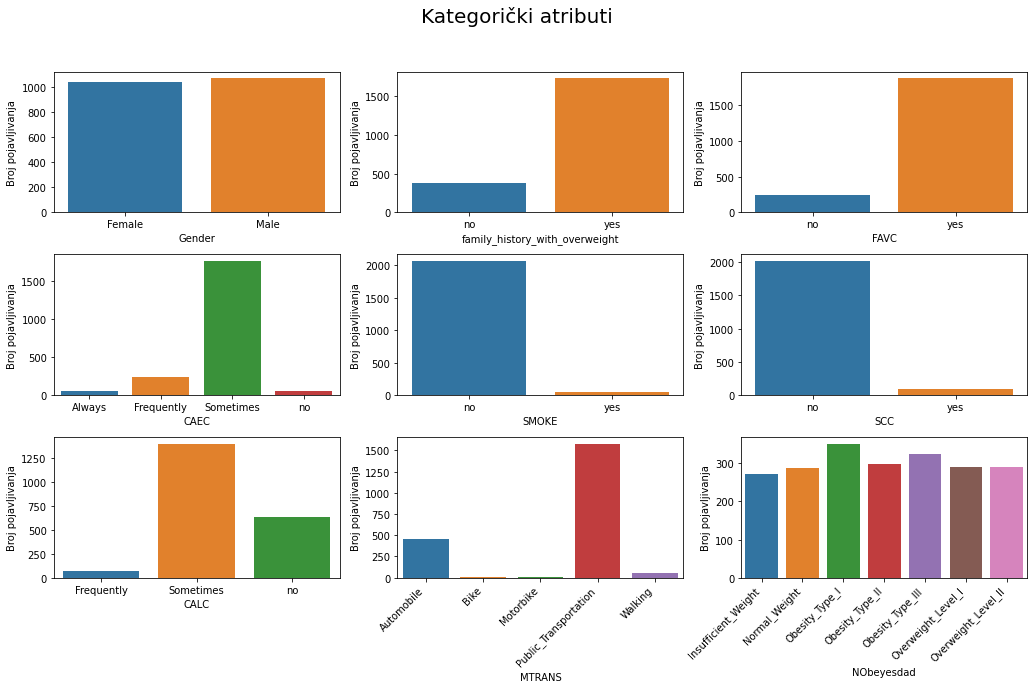

In [44]:
# Grafički prikaz kategoričkih atributa
categorical_attributes = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", 
                   "NObeyesdad"]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(categorical_attributes, axs.flatten()):
    sns.countplot(x=dataset[col], data=dataset, ax=subplot)
    subplot.yaxis.label.set_text("Broj pojavljivanja")
    if col=="MTRANS" or col=="NObeyesdad":
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=dataset.groupby([col]).groups.keys())
        
fig.suptitle("Kategorički atributi", fontsize=20)
plt.tight_layout(pad=3, w_pad=0.0, h_pad=1)
plt.show()

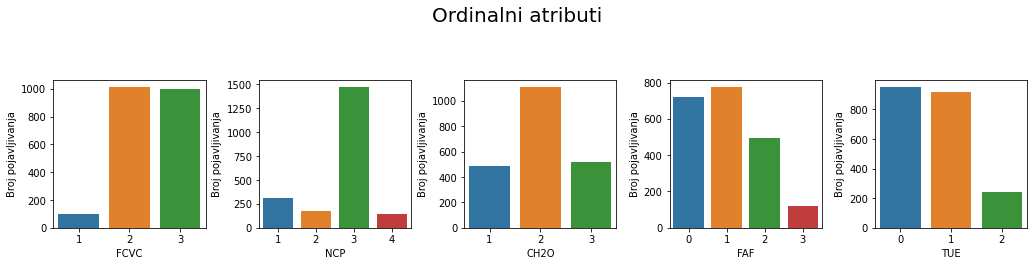

In [45]:
# Grafički prikaz ordinalnih atributa
ordinal_attributes = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(ordinal_attributes, ax.flatten()):
    sns.countplot(x=dataset[col], data=dataset, ax=subplot)
    subplot.yaxis.label.set_text("Broj pojavljivanja")

# show figure & plots
fig.suptitle("Ordinalni atributi", fontsize=20)
plt.tight_layout(pad=3, w_pad=0.7, h_pad=0.5)
plt.show()

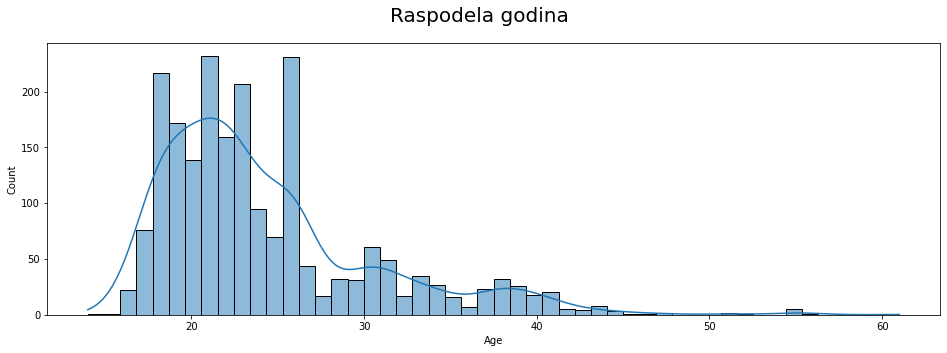

In [46]:
# Grafički prikaz atributa "Age"
fig = plt.figure(figsize = (16,5))
sns.histplot(x=dataset["Age"], kde=True)
fig.suptitle("Raspodela godina", fontsize=20)
plt.show()

In [47]:
dataset.corr()

,Age,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,0.005366,-0.043367,-0.024635,-0.132737,-0.285801
FCVC,0.005366,1.000000,0.011111,0.061140,0.013661,-0.077269
NCP,-0.043367,0.011111,1.000000,0.063477,0.130322,0.013010
CH2O,-0.024635,0.061140,0.063477,1.000000,0.118205,-0.029207
FAF,-0.132737,0.013661,0.130322,0.118205,1.000000,0.055513
TUE,-0.285801,-0.077269,0.013010,-0.029207,0.055513,1.000000


In [48]:
#metoda za prikaz feature importance-a
def show_feature_importance(classifier, feature_data):
    feature_imp = pd.Series(classifier.feature_importances_, index=feature_data.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(10, 5))

    # Creating a bar plot
    sns.barplot(x=feature_imp.index, y=feature_imp)

    # Add labels to your graph
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()

## Klasifikacija (bez redukcije dimenzionalnosti)

### Priprema podataka

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def prepare_data(dataset, for_reduction = False):
    # Prebacivanje kategoričkih podataka u one-hot oblik
    dataset_copy = dataset.copy()
    dataset_copy = pd.get_dummies(dataset_copy, columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
    
    # Enkodiranje klasnog atributa
    le = LabelEncoder()
    dataset_copy["NObeyesdad"] = le.fit_transform(dataset_copy["NObeyesdad"])
    
    if for_reduction == True:
        dataset_copy = dataset_copy.drop(columns=["MTRANS_Bike", "MTRANS_Motorbike", "SMOKE_yes", "SMOKE_no", "MTRANS_Walking",
                                                  "CAEC_no", "CAEC_Always", "SCC_yes", "CALC_Frequently", "SCC_no"])
    
    # Odvajanje klasnog atributa od ostalih
    class_data = dataset_copy["NObeyesdad"]
    feature_data = dataset_copy.drop(columns=["NObeyesdad"])
    
    # Skaliranje atributa
    ss = StandardScaler()
    #feature_data = ss.fit_transform(feature_data)
    minVal = min(feature_data["Age"])
    maxVal = max(feature_data["Age"])
    feature_data["Age"] = (feature_data["Age"] - minVal) / ( maxVal - minVal )
    
    return feature_data, class_data

In [50]:
feature_data, class_data = prepare_data(dataset)

# Podela skupa podataka na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(feature_data, class_data, random_state=7, test_size=0.2)

### Decision Tree

Accuracy dt: 0.7635933806146572
Confusion matrix:
 [[43  6  1  0  0  0  3]
 [ 7 35  5  4  1  8  4]
 [ 0  9 50  0  1 10  4]
 [ 0  1  4 45  0  0  2]
 [ 0  0  0  0 71  0  0]
 [ 2  2  4  1  0 35  3]
 [ 1  2  8  3  1  3 44]]


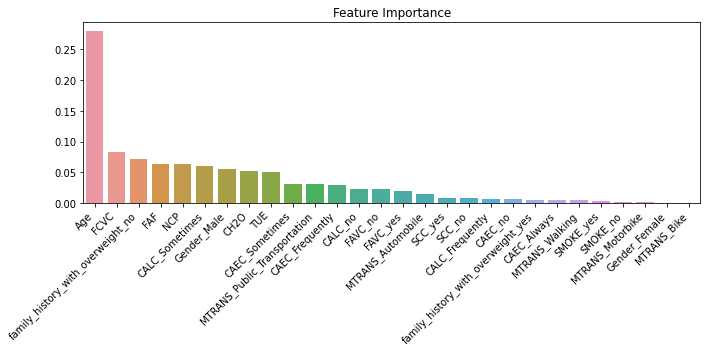

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy dt:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
show_feature_importance(dtc, feature_data)

### Random Forest

Accuracy RandomForest: 0.8085106382978723
Confusion matrix:
 [[49  2  1  0  0  1  0]
 [ 8 37  6  1  0  7  5]
 [ 1  8 56  2  2  4  1]
 [ 0  0  2 48  0  0  2]
 [ 0  0  0  0 71  0  0]
 [ 0  5  6  0  0 34  2]
 [ 1  3  4  6  0  1 47]]


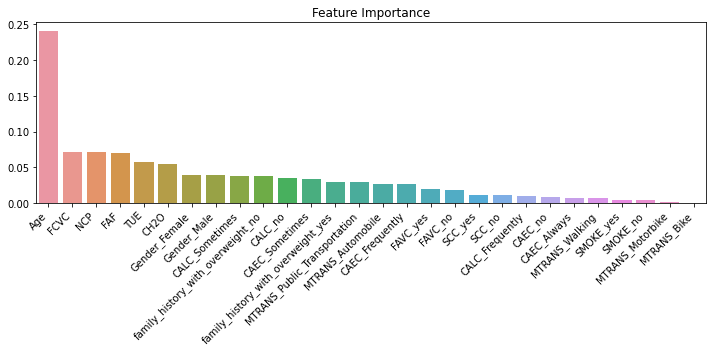

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2021)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy RandomForest:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
show_feature_importance(rfc, feature_data)

### Binarna Random Forest klasifikacija

In [53]:
def prepare_data_bin(dataset):
    weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}
    
    dataset_copy = dataset.copy()
    dataset_copy["Obese"] = dataset_copy['NObeyesdad'].map(weight_map)
    dataset_copy = pd.get_dummies(dataset_copy, columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
    
    class_data = dataset_copy["Obese"]
    feature_data = dataset_copy.drop(columns=["NObeyesdad", "Obese"])
    
    # Skaliranje atributa
    ss = StandardScaler()
    #feature_data = ss.fit_transform(feature_data)
    minVal = min(feature_data["Age"])
    maxVal = max(feature_data["Age"])
    feature_data["Age"] = (feature_data["Age"] - minVal) / ( maxVal - minVal )
    
    return feature_data, class_data

Accuracy dt: 0.9148936170212766
Confusion matrix:
 [[211  15]
 [ 21 176]]


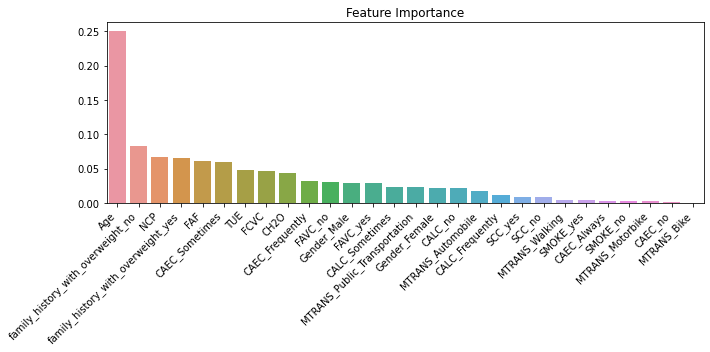

In [54]:
feature_data_bin, class_data_bin = prepare_data_bin(dataset)
X_train, X_test, y_train, y_test = train_test_split(feature_data_bin, class_data_bin, random_state=7, test_size=0.2)

rfc_bin = RandomForestClassifier(random_state=2021)
rfc_bin.fit(X_train, y_train)
y_pred = rfc_bin.predict(X_test)
print("Accuracy dt:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
show_feature_importance(rfc_bin, feature_data_bin)

### Logistička regresija

In [55]:
from sklearn.linear_model import LogisticRegression

feature_data_bin, class_data_bin = prepare_data_bin(dataset)
X_train, X_test, y_train, y_test = train_test_split(feature_data_bin, class_data_bin, random_state=7, test_size=0.2)

logreg = LogisticRegression(max_iter=10000, solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy dt:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy dt: 0.7612293144208038
Confusion matrix:
 [[155  71]
 [ 30 167]]


### OneVsRest klasifikacija

In [56]:
from sklearn.multiclass import OneVsRestClassifier

feature_data, class_data = prepare_data(dataset)
X_train, X_test, y_train, y_test = train_test_split(feature_data, class_data, random_state=7, test_size=0.2)

ovrc = OneVsRestClassifier(RandomForestClassifier(random_state=2020))
ovrc.fit(X_train, y_train)
y_pred = ovrc.predict(X_test)
print("Accuracy dt:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy dt: 0.8321513002364066
Confusion matrix:
 [[50  2  0  0  0  1  0]
 [ 6 42  6  1  0  4  5]
 [ 1  7 57  2  2  4  1]
 [ 0  0  1 48  0  0  3]
 [ 0  0  0  0 71  0  0]
 [ 0  4  5  0  0 37  1]
 [ 0  5  2  5  0  3 47]]


### OneVsOne klasifikacija

In [57]:
from sklearn.multiclass import OneVsOneClassifier

feature_data, class_data = prepare_data(dataset)
X_train, X_test, y_train, y_test = train_test_split(feature_data, class_data, random_state=7, test_size=0.2)

ovoc = OneVsOneClassifier(RandomForestClassifier(random_state=2020))
ovoc.fit(X_train, y_train)
y_pred = ovoc.predict(X_test)
print("Accuracy dt:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy dt: 0.8368794326241135
Confusion matrix:
 [[49  3  1  0  0  0  0]
 [ 5 45  6  0  0  4  4]
 [ 1  6 57  1  2  6  1]
 [ 0  0  1 49  0  0  2]
 [ 0  0  0  0 71  0  0]
 [ 0  5  3  0  0 36  3]
 [ 0  5  2  6  0  2 47]]


## Redukcija dimenzionalnosti (RandomForest)

Accuracy RandomForest: 0.817966903073286
Confusion matrix:
 [[48  4  1  0  0  0  0]
 [ 6 40  6  1  0  7  4]
 [ 1  6 57  1  2  6  1]
 [ 0  0  1 48  0  0  3]
 [ 0  0  0  0 71  0  0]
 [ 0  4  5  0  0 36  2]
 [ 2  3  3  6  0  2 46]]


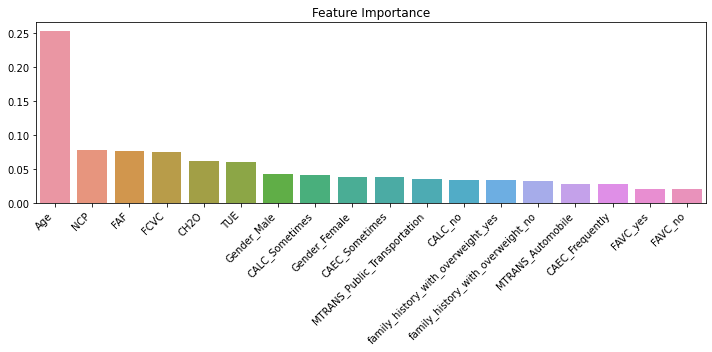

In [58]:
rrfc = RandomForestClassifier(random_state=2021)

feature_data, class_data = prepare_data(dataset, for_reduction=True)

X_train, X_test, y_train, y_test = train_test_split(feature_data, class_data, random_state=7, test_size=0.2)
rrfc.fit(X_train, y_train)
y_pred = rrfc.predict(X_test)

print("Accuracy RandomForest:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
show_feature_importance(rrfc, feature_data)